In [1]:

import netCDF4
import numpy as np 
import pandas as pd
import scipy.stats as sci
from fitter import Fitter, get_common_distributions, get_distributions

def CDF(data , intervals):
    data = np.array(data)
    N = len(data)
    cdf = []
    nc = 0 
    for i in range(len(intervals)-1):
        qu_1 = data[ data >= intervals[i] ]
        qu_2 = qu_1[qu_1 < intervals[i+1] ]
        n = len(qu_2)
        nc+=n
        cdf.append(nc/N)
    return cdf


def cor_matrix( df , Keys  , cri = 'pearson' ):
    Keys = np.array(Keys)
    k = len(Keys)
    out = np.zeros((k,k))
    for i  in range(k)  :
        for j in range(k): 
            if cri == 'pearson' :
                out[i,j] = np.corrcoef(df[Keys[i]] , df[Keys[j]])[0,1]
            elif cri  ==  'spearman':
                out[i,j] = spearman = sci.spearmanr(df[Keys[i]] , df[Keys[j]])[0]  

    out = pd.DataFrame(out , columns= Keys  , index= Keys)
    return out

def nc_to_pd(nc):
    try:
        Keys = list(nc.keys())
    except:
        Keys = list(nc.variables)
    Panda = pd.DataFrame()
    for k in Keys:
        Panda[k]= np.array(nc[k] )
    return Panda

def rescale( data ) :
    means = np.mean(data , axis = 0 )
    std = np.std( data , axis =0)
    return (data -means ) / std

def ADD(df , Key , df_info   , Key_info):
    unq = list(df[Key].unique())
    
    for k in Unique



In [64]:
fp = r'../dataset\dataset_2014-2024_0019.nc4'
nc = netCDF4.Dataset( fp )
df  = nc_to_pd(nc)

In [3]:
excel_stations = pd.read_excel('../stations/stations_noaa_n_100_australia_excluded.xlsx')

In [7]:
excel_stations

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,number_of_data,min_year,max_year
0,0,0,0,94672099999,"b'ADELAIDE INTERNATIONAL, AS'",-34.945000,138.530556,6.09,3721,2014,2024
1,1,1,1,95677099999,"b'ADELAIDE PARAFIELD, AS'",-34.793333,138.633056,17.37,3724,2014,2024
2,2,2,2,94210099999,"b'ADELE ISLAND, AS'",-15.516667,123.150000,5.00,3122,2014,2024
3,3,3,3,94846099999,"b'AIREYS INLET, AS'",-38.450000,144.100000,95.00,3714,2014,2024
4,4,4,4,94802099999,"b'ALBANY AIRPORT, AS'",-34.941400,117.802200,69.00,3702,2014,2024
...,...,...,...,...,...,...,...,...,...,...,...
482,492,514,514,94397099999,"b'MORANBAH, AS'",-22.057778,148.077500,234.69,1357,2020,2024
483,493,515,515,94873199999,"b'PUCKAPUNYAL LYON HILL DEFENCE, AS'",-36.940000,145.050000,193.00,1193,2020,2024
484,494,516,516,94856099999,"b'PUCKAPUNYAL WEST, AS'",-38.083000,144.333000,55.00,1325,2020,2024
485,495,517,517,94876099999,"b'FRANKSTON BALLAM PARK, AS'",-35.667000,145.617000,110.00,863,2021,2024


In [53]:
Key = 'STATION'
key_info = 'number_of_data'
df[Key].unique()

unq = list(df[Key].unique())





In [54]:
df_info = excel_stations
df_info_new = pd.DataFrame(np.array(df_info ), index= np.array(df_info[Key] )  , columns= list(df_info.keys()))


In [55]:
df_info_new

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,number_of_data,min_year,max_year
94672099999,0,0,0,94672099999,"b'ADELAIDE INTERNATIONAL, AS'",-34.945,138.530556,6.09,3721,2014,2024
95677099999,1,1,1,95677099999,"b'ADELAIDE PARAFIELD, AS'",-34.793333,138.633056,17.37,3724,2014,2024
94210099999,2,2,2,94210099999,"b'ADELE ISLAND, AS'",-15.516667,123.15,5.0,3122,2014,2024
94846099999,3,3,3,94846099999,"b'AIREYS INLET, AS'",-38.45,144.1,95.0,3714,2014,2024
94802099999,4,4,4,94802099999,"b'ALBANY AIRPORT, AS'",-34.9414,117.8022,69.0,3702,2014,2024
...,...,...,...,...,...,...,...,...,...,...,...
94397099999,492,514,514,94397099999,"b'MORANBAH, AS'",-22.057778,148.0775,234.69,1357,2020,2024
94873199999,493,515,515,94873199999,"b'PUCKAPUNYAL LYON HILL DEFENCE, AS'",-36.94,145.05,193.0,1193,2020,2024
94856099999,494,516,516,94856099999,"b'PUCKAPUNYAL WEST, AS'",-38.083,144.333,55.0,1325,2020,2024
94876099999,495,517,517,94876099999,"b'FRANKSTON BALLAM PARK, AS'",-35.667,145.617,110.0,863,2021,2024


In [59]:

def Add(  to_df , with_key , from_df ,  with_key_info  ):
    df_info = from_df
    key_info = with_key_info
    df = to_df 
    Key = with_key

    unq = list(df[Key].unique())
    df_info_new = pd.DataFrame(np.array(df_info ), index= np.array(df_info[Key] )  , columns= list(df_info.keys()))
    out_def = []
    for k in unq  :
        querry = df[df[Key] == k]
        nq = len(querry)
        value = df_info_new[key_info][ k]
        querry[key_info] = np.array( [value] * nq)
        out_def.append(querry)
    return pd.concat(out_def)

In [3]:
df['ERA5_tp'] = df['ERA5_tp'] *24 * 1000
df['PRCP']   =  df['PRCP'] *24

In [4]:
thresold = 60 
df = df[df['CAL_P']>=0][df['PDIR']>=0][df['ERA5_tp'] >= 0 ][df['CAL_P(-1)']>=0][df['PRCP'] >= thresold]

C:\Users\S4055367\AppData\Local\Temp\ipykernel_18832\2401598106.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['CAL_P']>=0][df['PDIR']>=0][df['ERA5_tp'] >= 0 ][df['CAL_P(-1)']>=0][df['PRCP'] >= thresold]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_18832\2401598106.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['CAL_P']>=0][df['PDIR']>=0][df['ERA5_tp'] >= 0 ][df['CAL_P(-1)']>=0][df['PRCP'] >= thresold]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_18832\2401598106.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['CAL_P']>=0][df['PDIR']>=0][df['ERA5_tp'] >= 0 ][df['CAL_P(-1)']>=0][df['PRCP'] >= thresold]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_18832\2401598106.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['CAL_P']>=0][df['PDIR']>=0][df['ERA5_tp'] >= 0 ][df['CAL_P(-1)']>=0][df['PRCP'] >= th

In [5]:
df['IMERG']  = df['CAL_P']

In [9]:
df['SEASON']  =  (df['MONTH'] /3.1 ).astype(int)

In [72]:
df['1/(cape+1)']  = ( 1/  2*(df['ERA5_cape']**0.5 +1 )**0.5)**0.5

<Axes: xlabel='1/(cape+1)', ylabel='PRCP'>

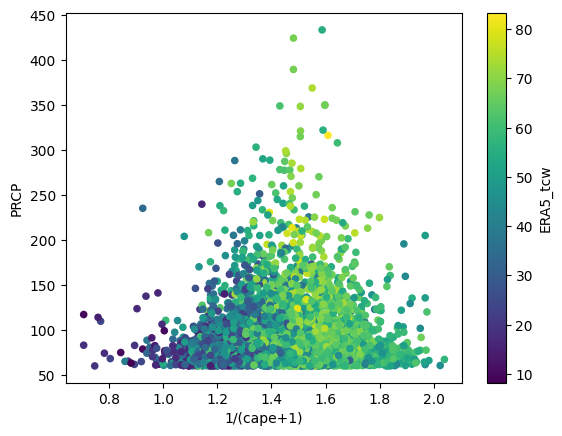

In [73]:
var_1 = '1/(cape+1)'
var_2 = 'PRCP'
var_3 = 'ERA5_tcw'

df.plot.scatter(x=var_1 ,
                y=var_2,
                c=var_3, 
                colormap= 'viridis')


In [74]:
np.corrcoef(  df['PRCP']  ,df['1/(cape+1)']  )

array([[ 1., nan],
       [nan, nan]])

In [77]:
df['1/(cape+1)'].min()

0.7071067811865476

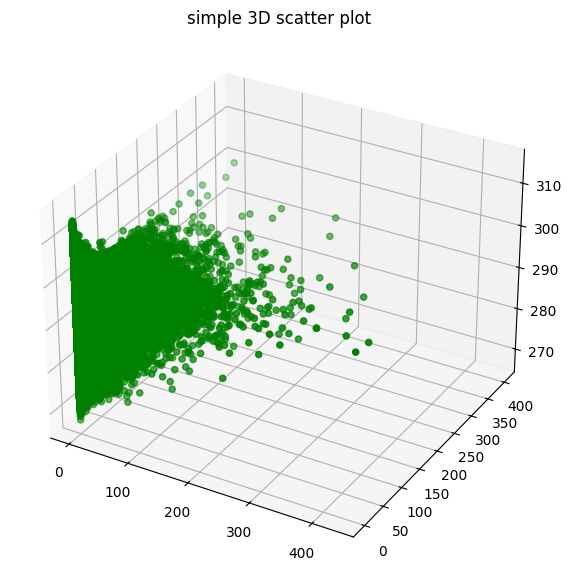

In [52]:


# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Creating dataset

x = df['PRCP']
y = df['ERA5_tp']
z = df['ERA5_t2m']
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [77]:

List = ['PRCP', 'CAL_P' , 'CAL_P(-1)', 'CAL_P(-2)', 'CAL_P(-3)', 'CAL_P(-4)','CAL_P(-5)','ERA5_cape',        
       'ERA5_cape(-1)', 'ERA5_cape(-2)', 'ERA5_cape(-3)' ,'ERA5_cape(-4)', 'ERA5_cape(-5)', 'ERA5_msl', 'ERA5_msl(-1)',
       'ERA5_msl(-2)', 'ERA5_msl(-3)', 'ERA5_msl(-4)', 'ERA5_msl(-5)', 'ERA5_t2m', 'ERA5_t2m(-1)', 'ERA5_t2m(-2)', 'ERA5_t2m(-3)',
       'ERA5_t2m(-4)', 'ERA5_t2m(-5)', 'ERA5_tcw', 'ERA5_tcw(-1)','ERA5_tcw(-2)', 'ERA5_tcw(-3)', 'ERA5_tcw(-4)', 'ERA5_tcw(-5)',
       'ERA5_tp', 'ERA5_tp(-1)', 'ERA5_tp(-2)', 'ERA5_tp(-3)', 'ERA5_tp(-4)','ERA5_tp(-5)','PDIR', 'PDIR(-1)', 'PDIR(-2)', 'PDIR(-3)', 'PDIR(-4)', 'PDIR(-5)'
       ] 
method  = 'spearman'
of = '../results/cormat_spearman_all_60mm.xlsx'

cormat = cor_matrix( df ,List  ,  method )
cormat.to_excel(of)


In [9]:
all_Dist = get_distributions()
print(all_Dist)

['_fit', 'alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genhyperbolic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gibrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'jf_skew_t', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'multivariate_normal', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh',

In [21]:

data = df['PRCP']
dist = [  'gumbel_l' , 'genhyperbolic', 'geninvgauss' ] 
f = Fitter(data, distributions= dist)
f.fit()

2024-04-18 15:18:29.182 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gumbel_l distribution with error=0.039952)
2024-04-18 15:18:51.227 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED genhyperbolic distribution (taking more than 30 seconds)
2024-04-18 15:18:51.229 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED geninvgauss distribution (taking more than 30 seconds)


2024-04-18 15:19:12.612 | WARNING  | fitter.fitter:plot_pdf:417 - genhyperbolic was not fitted. no parameters available
2024-04-18 15:19:12.679 | WARNING  | fitter.fitter:plot_pdf:417 - geninvgauss was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gumbel_l,0.039952,7.409575e+05,7.409821e+05,inf,0.564143,0.0
genhyperbolic,inf,inf,inf,inf,NaN,NaN
geninvgauss,inf,inf,inf,inf,NaN,NaN


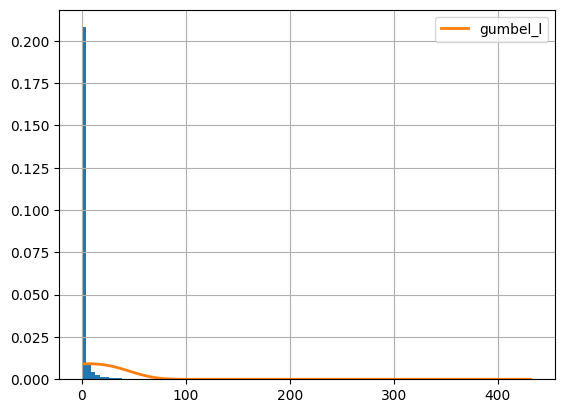

In [22]:
f.summary()

# Fit Distribution to data

Text(0, 0.5, '$p$')

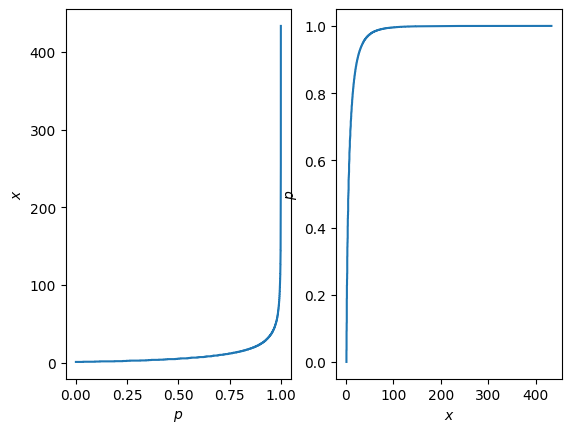

In [8]:
import matplotlib.pyplot as plt
import numpy as np

var = 'PRCP'
# create some randomly ddistributed data:
data = df[ df[var] > 1][var]
# sort the data:
data_sorted = np.sort(data)

# calculate the proportional values of samples
p = 1. * np.arange(len(data)) / (len(data) - 1)

# plot the sorted data:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(p, data_sorted)
ax1.set_xlabel('$p$')
ax1.set_ylabel('$x$')

ax2 = fig.add_subplot(122)
ax2.plot(data_sorted, p)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$p$')

In [9]:
data = df[ df[var] > 0][var]
data_sorted = np.sort(data)
DF = pd.DataFrame( {'data': data_sorted } )
DF.to_excel('../data_obs_sorted.xlsx')

In [12]:
import numpy as np
from distfit import distfit

# Generate 10000 normal distribution samples with mean 0, std dev of 3 
X = data

# Initialize distfit
dist = distfit()

# Determine best-fitting probability distribution for data
dist.fit_transform(X)



[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.01 sec] [RSS: 2.60258] [loc=6.233 scale=12.636]
[distfit] >INFO> [expon     ] [0.0 sec] [RSS: 2.01278] [loc=0.240 scale=5.993]
[distfit] >INFO> [pareto    ] [1.32 sec] [RSS: 2.01278] [loc=-1073741823.760 scale=1073741824.000]
[distfit] >INFO> [dweibull  ] [19.9 sec] [RSS: 6.72085] [loc=0.480 scale=3.238]
[distfit] >INFO> [t         ] [60.8 sec] [RSS: 1.52811] [loc=0.576 scale=0.654]
[distfit] >INFO> [genextreme] [105. sec] [RSS: 0.970875] [loc=0.325 scale=0.544]
[distfit] >INFO> [gamma     ] [65.6 sec] [RSS: 0.527021] [loc=0.240 scale=1.567]
[distfit] >INFO> [lognorm   ] [3.26 sec] [RSS: 1.9177] [loc=0.240 scale=0.001]
[distfit] >INFO> [beta      ] [43.1 sec] [RSS: 0.479801] [loc=0.240 scale=2048.787]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 2.82689] [loc=0.240 scale=433.200]
[distfit] >INFO> [loggamma  ] [17.2 sec] [RSS: 2.60953] [loc=-4668.116 scale=609.070]
[distfit] >INFO> Compute confidence inte

{'model': {'name': 'beta',
  'score': 0.47980078136051113,
  'loc': 0.23999999999999996,
  'scale': 2048.7869618245786,
  'arg': (0.4168099725590526, 466.86938138823393),
  'params': (0.4168099725590526,
   466.86938138823393,
   0.23999999999999996,
   2048.7869618245786),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x1208de04150>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': 0.24248766625646556,
  'CII_max_alpha': 7.722998499986282},
 'summary':           name     score            loc              scale  \
 0         beta  0.479801           0.24        2048.786962   
 1        gamma  0.527021           0.24           1.567293   
 2   genextreme  0.970875        0.32517           0.544277   
 3            t  1.528107       0.576319           0.653974   
 4      lognorm  1.917705           0.24           0.000618   
 5       pareto  2.012783 -1073741823.76  1073741823.999999   
 6        expon  2.012783           

In [49]:
var = 'PRCP'
data = df[ df[var] > 0][var]
intervals =  [ i*0.5 for i in range(0 , 800 , 1) ] 
cdf = CDF(data , intervals+ [10000])
df_cdf = pd.DataFrame( {'cdf' : cdf  , 'data' : intervals })
df_cdf.to_excel( '..\cdf_obs.xlsx')

<Axes: >

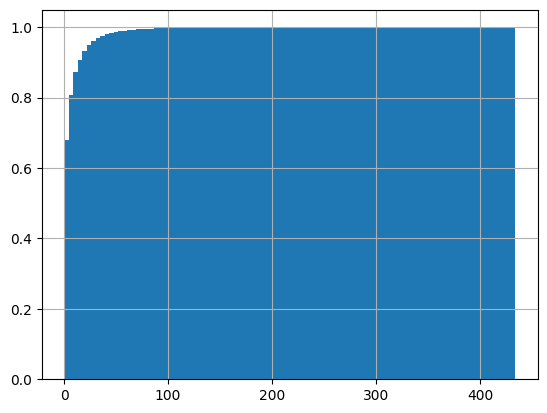

In [37]:
data.hist(cumulative=True, density=1, bins=100)

<Axes: >

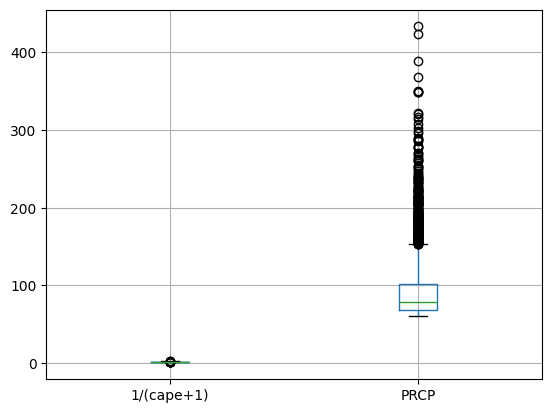

In [80]:
df.boxplot(['1/(cape+1)'  ,'PRCP' ]) 